In [1]:
#Basic packages always been used
import pandas as pd
import numpy as np
import sktime
import matplotlib.pyplot as plt
# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split
# ALgorithm
from sklearn import tree
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error

In [2]:
data = pd.read_csv("nasdaq.csv")

In [3]:
x=data.drop(['Date','Close'],axis=1).copy()
x.head()

,Close-2,Close-1
0,15782.83008,15537.69043
1,15537.69043,15254.04981
2,15254.04981,15381.32031
3,15381.32031,15085.46973
4,15085.46973,15225.15039


In [4]:
y=data['Close'].copy()
y.head()

0    15254.04981
1    15381.32031
2    15085.46973
3    15225.15039
4    15686.91992
Name: Close, dtype: float64

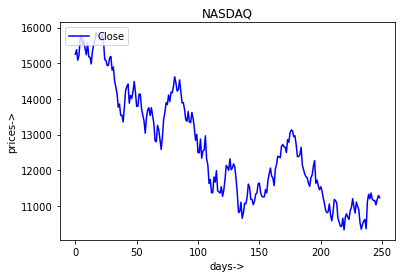

In [8]:
date = data["Close"]
plt.plot(date, color='blue', label='Close')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.title('NASDAQ')
plt.legend(loc='upper left')
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(len(y_train))

199


### Cart Holdout + Cross Validation Expanding Window

In [6]:
x_train1 = np.array(x[0:62])
y_train1 = np.array(y[0:62])
x_validation1 = np.array(x[62:124])
y_validation1 = np.array(y[62:124])

x_train2 = np.array(x[0:124])
y_train2 = np.array(y[0:124])
x_validation2 = np.array(x[124:186])
y_validation2 = np.array(y[124:186])

x_train3 = np.array(x[0:186])
y_train3 = np.array(y[0:186])
x_validation3 = np.array(x[186:250])
y_validation3 = np.array(y[186:250])

In [7]:
#第一次
a = [2,6,8]
b = [5,20,100]

mse_2_5 = 0
mse_2_20 = 0
mse_2_100 = 0
mse_6_5 = 0
mse_6_20 = 0
mse_6_100 = 0
mse_8_5 = 0
mse_8_20 = 0
mse_8_100 = 0

for i in a:
    for j in b:
        model_cart=DecisionTreeRegressor(max_depth=i,max_leaf_nodes=j,random_state=0)
        model_cart.fit(x_train1,y_train1)
            
        train_pred=model_cart.predict(x_validation1)
        mse=mean_squared_error(y_validation1,train_pred,squared=True)
            
        if i==2 and j==5:
            mse_2_5 += mse
        if i==2 and j==20:
            mse_2_20 += mse
        if i==2 and j==100:
            mse_2_100 += mse
        if i==6 and j==5:
            mse_6_5 += mse
        if i==6 and j==20:
            mse_6_20 += mse
        if i==6 and j==100:
            mse_6_100 += mse
        if i==8 and j==5:
            mse_8_5 += mse
        if i==8 and j==20:
            mse_8_20 += mse
        if i==8 and j==100:
            mse_8_100 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_2_5),2))
print('mse_2_20:',round((mse_2_20),2))
print('mse_2_100:',round((mse_2_100),2))
print('mse_6_5:',round((mse_6_5),2))
print('mse_6_20:',round((mse_6_20),2))
print('mse_6_100:',round((mse_6_100),2))
print('mse_8_5:',round((mse_8_5),2))
print('mse_8_20:',round((mse_8_20),2))
print('mse_8_100:',round((mse_8_100),2))

MSE:
mse_2_5: 1138335.22
mse_2_20: 1138335.22
mse_2_100: 1138335.22
mse_6_5: 1132309.29
mse_6_20: 1282301.72
mse_6_100: 1096070.42
mse_8_5: 1132309.29
mse_8_20: 1282301.72
mse_8_100: 1094172.54


In [8]:
#第二次
a = [2,6,8]
b = [5,20,100]

mse_2_5 = 0
mse_2_20 = 0
mse_2_100 = 0
mse_6_5 = 0
mse_6_20 = 0
mse_6_100 = 0
mse_8_5 = 0
mse_8_20 = 0
mse_8_100 = 0

for i in a:
    for j in b:
        model_cart=DecisionTreeRegressor(max_depth=i,max_leaf_nodes=j,random_state=0)
        model_cart.fit(x_train2,y_train2)
            
        train_pred=model_cart.predict(x_validation2)
        mse=mean_squared_error(y_validation2,train_pred,squared=True)
            
        if i==2 and j==5:
            mse_2_5 += mse
        if i==2 and j==20:
            mse_2_20 += mse
        if i==2 and j==100:
            mse_2_100 += mse
        if i==6 and j==5:
            mse_6_5 += mse
        if i==6 and j==20:
            mse_6_20 += mse
        if i==6 and j==100:
            mse_6_100 += mse
        if i==8 and j==5:
            mse_8_5 += mse
        if i==8 and j==20:
            mse_8_20 += mse
        if i==8 and j==100:
            mse_8_100 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_2_5),2))
print('mse_2_20:',round((mse_2_20),2))
print('mse_2_100:',round((mse_2_100),2))
print('mse_6_5:',round((mse_6_5),2))
print('mse_6_20:',round((mse_6_20),2))
print('mse_6_100:',round((mse_6_100),2))
print('mse_8_5:',round((mse_8_5),2))
print('mse_8_20:',round((mse_8_20),2))
print('mse_8_100:',round((mse_8_100),2))

MSE:
mse_2_5: 254583.75
mse_2_20: 254583.75
mse_2_100: 254583.75
mse_6_5: 175278.55
mse_6_20: 168432.78
mse_6_100: 234377.19
mse_8_5: 175278.55
mse_8_20: 140628.71
mse_8_100: 196191.5


In [9]:
#第三次
a = [2,6,8]
b = [5,20,100]

mse_2_5 = 0
mse_2_20 = 0
mse_2_100 = 0
mse_6_5 = 0
mse_6_20 = 0
mse_6_100 = 0
mse_8_5 = 0
mse_8_20 = 0
mse_8_100 = 0

for i in a:
    for j in b:
        model_cart=DecisionTreeRegressor(max_depth=i,max_leaf_nodes=j,random_state=0)
        model_cart.fit(x_train3,y_train3)
            
        train_pred=model_cart.predict(x_validation3)
        mse=mean_squared_error(y_validation3,train_pred,squared=True)
            
        if i==2 and j==5:
            mse_2_5 += mse
        if i==2 and j==20:
            mse_2_20 += mse
        if i==2 and j==100:
            mse_2_100 += mse
        if i==6 and j==5:
            mse_6_5 += mse
        if i==6 and j==20:
            mse_6_20 += mse
        if i==6 and j==100:
            mse_6_100 += mse
        if i==8 and j==5:
            mse_8_5 += mse
        if i==8 and j==20:
            mse_8_20 += mse
        if i==8 and j==100:
            mse_8_100 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_2_5),2))
print('mse_2_20:',round((mse_2_20),2))
print('mse_2_100:',round((mse_2_100),2))
print('mse_6_5:',round((mse_6_5),2))
print('mse_6_20:',round((mse_6_20),2))
print('mse_6_100:',round((mse_6_100),2))
print('mse_8_5:',round((mse_8_5),2))
print('mse_8_20:',round((mse_8_20),2))
print('mse_8_100:',round((mse_8_100),2))

MSE:
mse_2_5: 416563.09
mse_2_20: 416563.09
mse_2_100: 416563.09
mse_6_5: 416563.09
mse_6_20: 106275.09
mse_6_100: 110740.96
mse_8_5: 416563.09
mse_8_20: 106275.09
mse_8_100: 127719.22


In [10]:
#三次平均
mse_2_5 = [1138335.22, 254583.75, 416563.09]
mse_2_20 = [1138335.22, 254583.75, 416563.09]
mse_2_100 = [1138335.22, 254583.75, 416563.09]
mse_6_5 = [1132309.29, 175278.55, 416563.09]
mse_6_20 = [1282301.72, 168432.78, 106275.09]
mse_6_100 = [1096070.42, 234377.19, 110740.96]
mse_8_5 = [1132309.29, 175278.55, 416563.09]
mse_8_20 = [1282301.72, 140628.78, 106275.09]
mse_8_100 = [1094172.54, 196191.5, 127719.22]

print('mse_2_5:',round(np.mean(mse_2_5),2),'+/-',round(np.std(mse_2_5),2))
print('mse_2_20:',round(np.mean(mse_2_20),2),'+/-',round(np.std(mse_2_20),2))
print('mse_2_100:',round(np.mean(mse_2_100),2),'+/-',round(np.std(mse_2_100),2))
print('mse_6_5:',round(np.mean(mse_6_5),2),'+/-',round(np.std(mse_6_5),2))
print('mse_6_20:',round(np.mean(mse_6_20),2),'+/-',round(np.std(mse_6_20),2))
print('mse_6_100:',round(np.mean(mse_6_100),2),'+/-',round(np.std(mse_6_100),2))
print('mse_8_5:',round(np.mean(mse_8_5),2),'+/-',round(np.std(mse_8_5),2))
print('mse_8_20:',round(np.mean(mse_8_20),2),'+/-',round(np.std(mse_8_20),2))
print('mse_8_100:',round(np.mean(mse_8_100),2),'+/-',round(np.std(mse_8_100),2))

mse_2_5: 603160.69 +/- 384159.83
mse_2_20: 603160.69 +/- 384159.83
mse_2_100: 603160.69 +/- 384159.83
mse_6_5: 574716.98 +/- 406395.91
mse_6_20: 519003.2 +/- 540329.76
mse_6_100: 480396.19 +/- 438263.66
mse_8_5: 574716.98 +/- 406395.91
mse_8_20: 509735.2 +/- 546467.03
mse_8_100: 472694.42 +/- 440339.57


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle=False)
model_cart=DecisionTreeRegressor(max_depth=8,max_leaf_nodes=100,random_state=0)
model_cart.fit(x_train,y_train)

train_pred = model_cart.predict(x_train)
train_mse = mean_squared_error(y_train,train_pred,squared=True)
train_rmse = mean_squared_error(y_train,train_pred, squared=False)
train_mape = mean_absolute_percentage_error(y_train,train_pred)
train_smape = 2*np.mean(np.abs(train_pred-y_train)/(np.abs(train_pred)+np.abs(y_train)))*100
train_mase = mean_absolute_scaled_error(y_train, train_pred, y_train=y_train)
train_mdrae = np.median(np.abs(y_train-train_pred)/(np.abs(y_train-x_train['Close-1'])))

test_pred = model_cart.predict(x_test)
test_mse = mean_squared_error(y_test,test_pred,squared=True)
test_rmse = mean_squared_error(y_test,test_pred, squared=False)
test_mape = mean_absolute_percentage_error(y_test,test_pred)
test_smape = 2*np.mean(np.abs(test_pred-y_test)/(np.abs(test_pred)+np.abs(y_test)))*100
test_mase = mean_absolute_scaled_error(y_test, test_pred, y_train=y_test)
test_mdrae = np.median(np.abs(y_test-test_pred)/(np.abs(y_test-x_test['Close-1'])))

print('train_mse : ', np.round(train_mse,4))
print('train_rmse: ', np.round(train_rmse,4))
print('train_mape: ', np.round(train_mape,4))
print('train_smape: ', np.round(train_smape,4))
print('train_mase: ', np.round(train_mase,4))
print('train_mdrae: ', np.round(train_mdrae,4))
print('')
print('test_mse : ', np.round(test_mse,4))
print('test_rmse: ', np.round(test_rmse,4))
print('test_mape: ', np.round(test_mape,4))
print('test_smape: ', np.round(test_smape,4))
print('test_mase: ', np.round(test_mase,4))
print('test_mdrae: ', np.round(test_mdrae,4))

train_mse :  6080.7453
train_rmse:  77.9791
train_mape:  0.0038
train_smape:  0.3806
train_mase:  0.235
train_mdrae:  0.2069

test_mse :  136016.2238
test_rmse:  368.8038
test_mape:  0.0292
test_smape:  2.8727
test_mase:  1.7978
test_mdrae:  1.8849


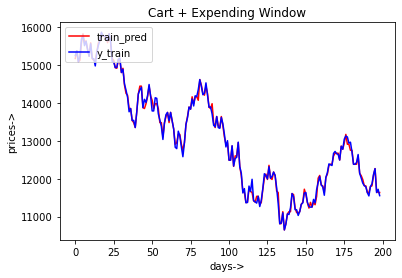

In [12]:
plt.plot(train_pred, color='red', label='train_pred')
plt.plot(y_train, color='blue', label='y_train')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.title('Cart + Expending Window')
plt.legend(loc='upper left')
plt.show()

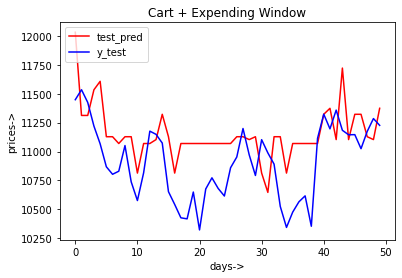

In [13]:
y_test = y_test.reset_index(drop=True)
plt.plot(test_pred, color='red', label='test_pred')
plt.plot(y_test, color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.title('Cart + Expending Window')
plt.legend(loc='upper left')
plt.show()

### Cart Holdout + Cross Validation Rolling Window

In [14]:
x_train1 = np.array(x[0:62])
y_train1 = np.array(y[0:62])
x_validation1 = np.array(x[62:124])
y_validation1 = np.array(y[62:124])

x_train2 = np.array(x[62:124])
y_train2 = np.array(y[62:124])
x_validation2 = np.array(x[124:186])
y_validation2 = np.array(y[124:186])

x_train3 = np.array(x[124:186])
y_train3 = np.array(y[124:186])
x_validation3 = np.array(x[186:250])
y_validation3 = np.array(y[186:250])

In [15]:
a = [2,6,8]
b = [5,20,100]

mse_2_5 = 0
mse_2_20 = 0
mse_2_100 = 0
mse_6_5 = 0
mse_6_20 = 0
mse_6_100 = 0
mse_8_5 = 0
mse_8_20 = 0
mse_8_100 = 0

for i in a:
    for j in b:
        model_cart=DecisionTreeRegressor(max_depth=i,max_leaf_nodes=j,random_state=0)
        model_cart.fit(x_train1,y_train1)
            
        train_pred=model_cart.predict(x_validation1)
        mse=int(mean_squared_error(y_validation1,train_pred))
            
        if i==2 and j==5:
            mse_2_5 += mse
        if i==2 and j==20:
            mse_2_20 += mse
        if i==2 and j==100:
            mse_2_100 += mse
        if i==6 and j==5:
            mse_6_5 += mse
        if i==6 and j==20:
            mse_6_20 += mse
        if i==6 and j==100:
            mse_6_100 += mse
        if i==8 and j==5:
            mse_8_5 += mse
        if i==8 and j==20:
            mse_8_20 += mse
        if i==8 and j==100:
            mse_8_100 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_2_5),2))
print('mse_2_20:',round((mse_2_20),2))
print('mse_2_100:',round((mse_2_100),2))
print('mse_6_5:',round((mse_6_5),2))
print('mse_6_20:',round((mse_6_20),2))
print('mse_6_100:',round((mse_6_100),2))
print('mse_8_5:',round((mse_8_5),2))
print('mse_8_20:',round((mse_8_20),2))
print('mse_8_100:',round((mse_8_100),2))

MSE:
mse_2_5: 1138335
mse_2_20: 1138335
mse_2_100: 1138335
mse_6_5: 1132309
mse_6_20: 1282301
mse_6_100: 1096070
mse_8_5: 1132309
mse_8_20: 1282301
mse_8_100: 1094172


In [16]:
a = [2,6,8]
b = [5,20,100]

mse_2_5 = 0
mse_2_20 = 0
mse_2_100 = 0
mse_6_5 = 0
mse_6_20 = 0
mse_6_100 = 0
mse_8_5 = 0
mse_8_20 = 0
mse_8_100 = 0

for i in a:
    for j in b:
        model_cart=DecisionTreeRegressor(max_depth=i,max_leaf_nodes=j,random_state=0)
        model_cart.fit(x_train2,y_train2)
            
        train_pred=model_cart.predict(x_validation2)
        mse=int(mean_squared_error(y_validation2,train_pred))
            
        if i==2 and j==5:
            mse_2_5 += mse
        if i==2 and j==20:
            mse_2_20 += mse
        if i==2 and j==100:
            mse_2_100 += mse
        if i==6 and j==5:
            mse_6_5 += mse
        if i==6 and j==20:
            mse_6_20 += mse
        if i==6 and j==100:
            mse_6_100 += mse
        if i==8 and j==5:
            mse_8_5 += mse
        if i==8 and j==20:
            mse_8_20 += mse
        if i==8 and j==100:
            mse_8_100 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_2_5),2))
print('mse_2_20:',round((mse_2_20),2))
print('mse_2_100:',round((mse_2_100),2))
print('mse_6_5:',round((mse_6_5),2))
print('mse_6_20:',round((mse_6_20),2))
print('mse_6_100:',round((mse_6_100),2))
print('mse_8_5:',round((mse_8_5),2))
print('mse_8_20:',round((mse_8_20),2))
print('mse_8_100:',round((mse_8_100),2))

MSE:
mse_2_5: 172059
mse_2_20: 172059
mse_2_100: 172059
mse_6_5: 172059
mse_6_20: 198883
mse_6_100: 274526
mse_8_5: 172059
mse_8_20: 198883
mse_8_100: 264875


In [17]:
a = [2,6,8]
b = [5,20,100]

mse_2_5 = 0
mse_2_20 = 0
mse_2_100 = 0
mse_6_5 = 0
mse_6_20 = 0
mse_6_100 = 0
mse_8_5 = 0
mse_8_20 = 0
mse_8_100 = 0

for i in a:
    for j in b:
        model_cart=DecisionTreeRegressor(max_depth=i,max_leaf_nodes=j,random_state=0)
        model_cart.fit(x_train3,y_train3)
            
        train_pred=model_cart.predict(x_validation3)
        mse=int(mean_squared_error(y_validation3,train_pred))
            
        if i==2 and j==5:
            mse_2_5 += mse
        if i==2 and j==20:
            mse_2_20 += mse
        if i==2 and j==100:
            mse_2_100 += mse
        if i==6 and j==5:
            mse_6_5 += mse
        if i==6 and j==20:
            mse_6_20 += mse
        if i==6 and j==100:
            mse_6_100 += mse
        if i==8 and j==5:
            mse_8_5 += mse
        if i==8 and j==20:
            mse_8_20 += mse
        if i==8 and j==100:
            mse_8_100 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_2_5),2))
print('mse_2_20:',round((mse_2_20),2))
print('mse_2_100:',round((mse_2_100),2))
print('mse_6_5:',round((mse_6_5),2))
print('mse_6_20:',round((mse_6_20),2))
print('mse_6_100:',round((mse_6_100),2))
print('mse_8_5:',round((mse_8_5),2))
print('mse_8_20:',round((mse_8_20),2))
print('mse_8_100:',round((mse_8_100),2))

MSE:
mse_2_5: 137693
mse_2_20: 137693
mse_2_100: 137693
mse_6_5: 134779
mse_6_20: 102234
mse_6_100: 130456
mse_8_5: 134779
mse_8_20: 102234
mse_8_100: 135557


In [18]:
mse_2_5 = [1138335, 172059, 137693]
mse_2_20 = [1138335, 172059, 137693]
mse_2_100 = [1138335, 172059, 137693]
mse_6_5 = [1132309, 172059, 134779]
mse_6_20 = [1282301, 198883, 102234]
mse_6_100 = [1096070, 274526, 130456]
mse_8_5 = [1132309, 172059, 134779]
mse_8_20 = [1282301, 198883, 102234]
mse_8_100 = [1094172, 264875, 135557]

print('mse_2_5:',round(np.mean(mse_2_5),2),'+/-',round(np.std(mse_2_5),2))
print('mse_2_20:',round(np.mean(mse_2_20),2),'+/-',round(np.std(mse_2_20),2))
print('mse_2_100:',round(np.mean(mse_2_100),2),'+/-',round(np.std(mse_2_100),2))
print('mse_6_5:',round(np.mean(mse_6_5),2),'+/-',round(np.std(mse_6_5),2))
print('mse_6_20:',round(np.mean(mse_6_20),2),'+/-',round(np.std(mse_6_20),2))
print('mse_6_100:',round(np.mean(mse_6_100),2),'+/-',round(np.std(mse_6_100),2))
print('mse_8_5:',round(np.mean(mse_8_5),2),'+/-',round(np.std(mse_8_5),2))
print('mse_8_20:',round(np.mean(mse_8_20),2),'+/-',round(np.std(mse_8_20),2))
print('mse_8_100:',round(np.mean(mse_8_100),2),'+/-',round(np.std(mse_8_100),2))

mse_2_5: 482695.67 +/- 463819.26
mse_2_20: 482695.67 +/- 463819.26
mse_2_100: 482695.67 +/- 463819.26
mse_6_5: 479715.67 +/- 461704.09
mse_6_20: 527806.0 +/- 534965.6
mse_6_100: 500350.67 +/- 425323.55
mse_8_5: 479715.67 +/- 461704.09
mse_8_20: 527806.0 +/- 534965.6
mse_8_100: 498201.33 +/- 424708.97


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle=False)
model_cart=DecisionTreeRegressor(max_depth=8,max_leaf_nodes=5,random_state=0)
model_cart.fit(x_train,y_train)

train_pred = model_cart.predict(x_train)
train_mse = mean_squared_error(y_train,train_pred,squared=True)
train_rmse = mean_squared_error(y_train,train_pred, squared=False)
train_mape = mean_absolute_percentage_error(y_train,train_pred)
train_smape = 2*np.mean(np.abs(train_pred-y_train)/(np.abs(train_pred)+np.abs(y_train)))*100
train_mase = mean_absolute_scaled_error(y_train, train_pred, y_train=y_train)
train_mdrae = np.median(np.abs(y_train-train_pred)/(np.abs(y_train-x_train['Close-1'])))

test_pred = model_cart.predict(x_test)
test_mse = mean_squared_error(y_test,test_pred,squared=True)
test_rmse = mean_squared_error(y_test,test_pred, squared=False)
test_mape = mean_absolute_percentage_error(y_test,test_pred)
test_smape = 2*np.mean(np.abs(test_pred-y_test)/(np.abs(test_pred)+np.abs(y_test)))*100
test_mase = mean_absolute_scaled_error(y_test, test_pred, y_train=y_test)
test_mdrae = np.median(np.abs(y_test-test_pred)/(np.abs(y_test-x_test['Close-1'])))

print('train_mse :', np.round(train_mse,4))
print('train_rmse:  ', np.round(train_rmse,4))
print('train_mape:  ', np.round(train_mape,4))
print('train_smape:  ', np.round(train_smape,4))
print('train_mase:  ', np.round(train_mase,4))
print('train_mdrae:  ', np.round(train_mdrae,4))
print('')
print('test_mse :', np.round(test_mse,4))
print('test_rmse:  ', np.round(test_rmse,4))
print('test_mape:  ', np.round(test_mape,4))
print('test_smape:  ', np.round(test_smape,4))
print('test_mase:  ', np.round(test_mase,4))
print('test_mdrae:  ', np.round(test_mdrae,4))

train_mse : 103871.7621
train_rmse:   322.2914
train_mape:   0.0205
train_smape:   2.0479
train_mase:   1.2844
train_mdrae:   1.3898

test_mse : 236623.8263
test_rmse:   486.44
test_mape:   0.0373
test_smape:   3.6321
test_mase:   2.2786
test_mdrae:   2.5561


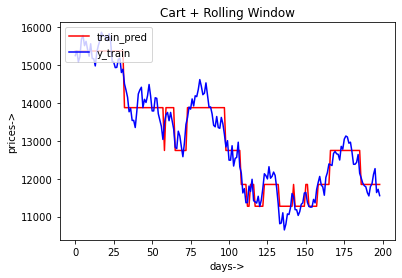

In [20]:
plt.plot(train_pred, color='red', label='train_pred')
plt.plot(y_train, color='blue', label='y_train')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.title('Cart + Rolling Window')
plt.legend(loc='upper left')
plt.show()

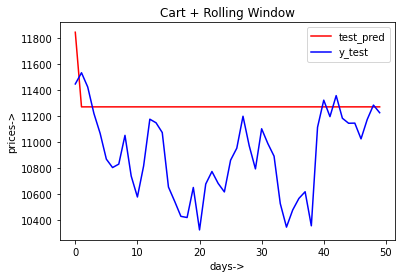

In [21]:
y_test = y_test.reset_index(drop=True)
plt.plot(test_pred, color='red', label='test_pred')
plt.plot(y_test, color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.title('Cart + Rolling Window')
plt.legend(loc='best')
plt.show()